Classification Report with adjusted threshold:
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       225
        True       0.93      0.96      0.94       313

    accuracy                           0.93       538
   macro avg       0.93      0.93      0.93       538
weighted avg       0.93      0.93      0.93       538

ROC AUC Score with adjusted threshold: 0.928746893858715
Cross-Validation Scores: [0.94981413 0.93494424 0.92007435 0.93866171 0.93668529]
Mean Cross-Validation Score: 0.9360359424864834


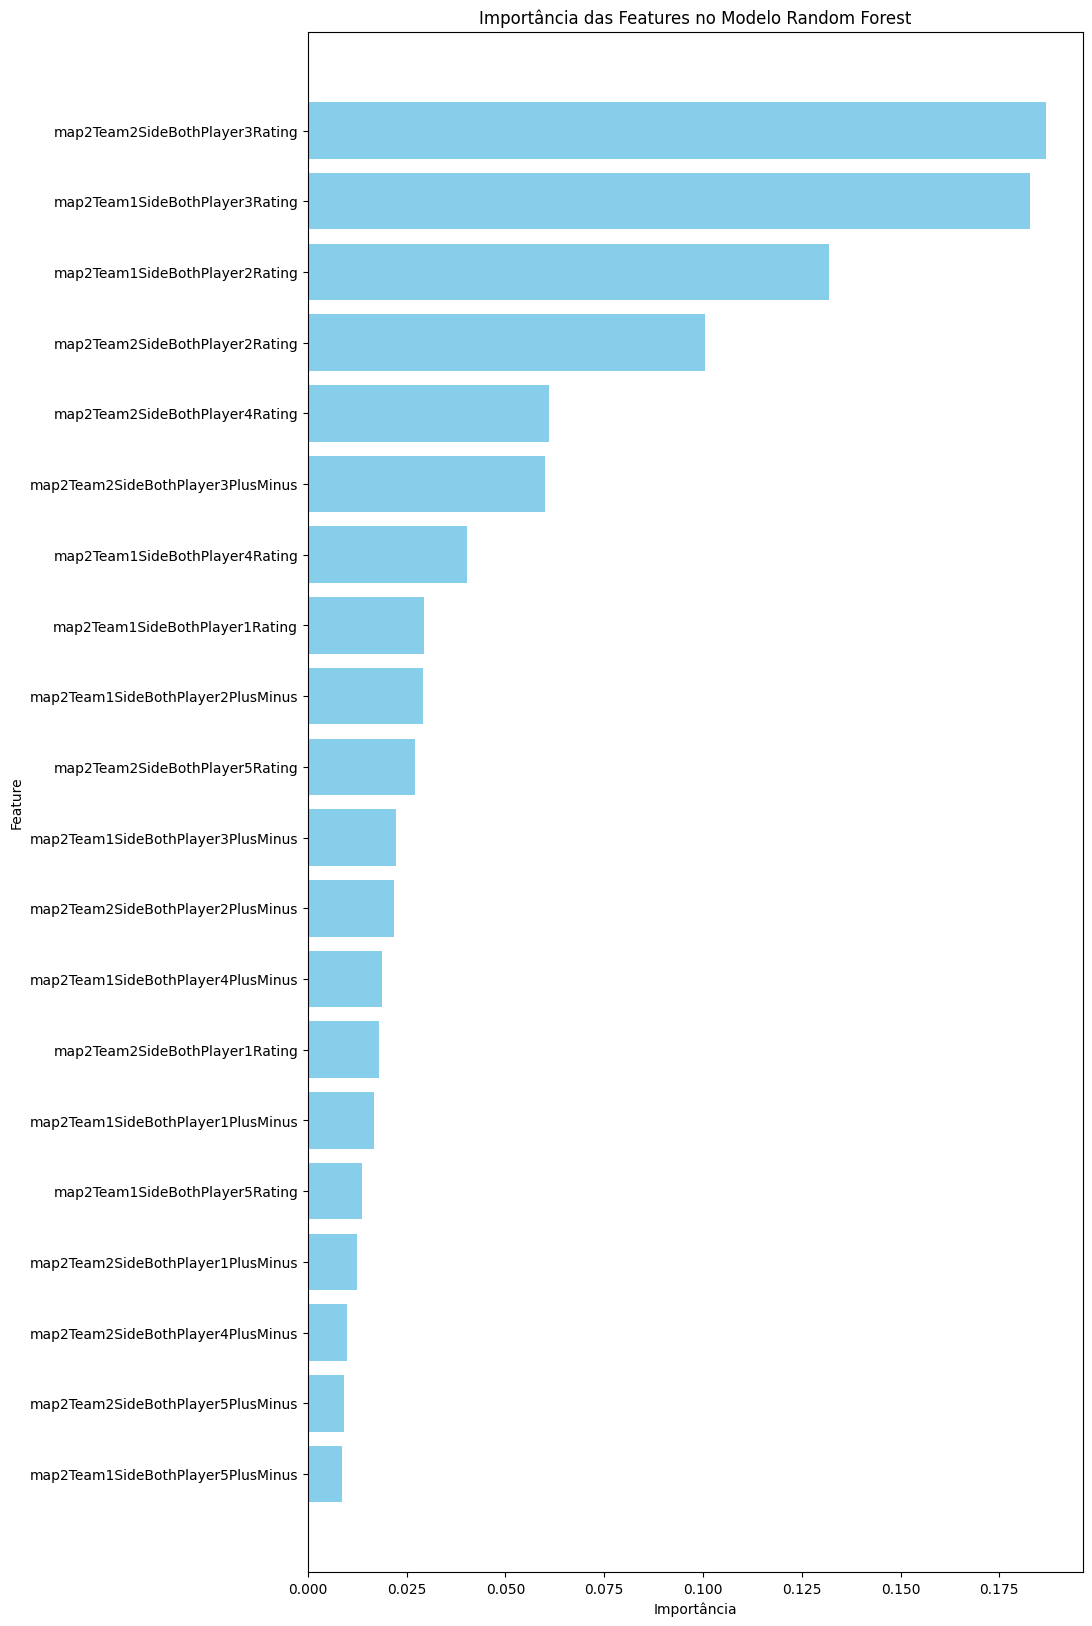

Acurácia do Modelo de Random Forest: 0.93
Score do modelo de Random Forest: 0.9330855018587361
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       225
        True       0.93      0.96      0.94       313

    accuracy                           0.93       538
   macro avg       0.93      0.93      0.93       538
weighted avg       0.93      0.93      0.93       538



In [22]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib
import matplotlib.pyplot as plt

# Training the model

# Read the CSV file into a DataFrame
full_matches_train_data = pd.read_csv('../data/processed/full_matches_train_data.csv')

# Features (colunas que serão utilizadas para fazer a previsão)
X = full_matches_train_data.drop(['teamOneWon', 'teamTwoWon'], axis=1)

# Target (coluna que será prevista)
y = full_matches_train_data['teamOneWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
clf = RandomForestClassifier(bootstrap=False, min_samples_split=10, random_state=42)

clf.fit(X_train, y_train)

# Make probability predictions on the test set
y_prob = clf.predict_proba(X_test)[:, 1]

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Define the new threshold for class "1" probabilities
new_threshold = 0.5

# Use the new threshold to classify samples into class "1" or class "0"
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
print("Classification Report with adjusted threshold:")
print(classification_report(y_test, y_pred_adjusted))

auc_score_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print("ROC AUC Score with adjusted threshold:", auc_score_adjusted)

# Avaliação com validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame to store the feature importances along with their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
# Plotando a importância das features
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features no Modelo Random Forest')
plt.gca().invert_yaxis()  # Coloca a feature mais importante no topo
plt.show()

# Save the trained model to a file
model_filename = 'trained_model.joblib'
joblib.dump(clf, f"../data/processed/{model_filename}")

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo de Random Forest: {accuracy:.2f}')
print(f"Score do modelo de Random Forest: {clf.score(X_test, y_test)}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

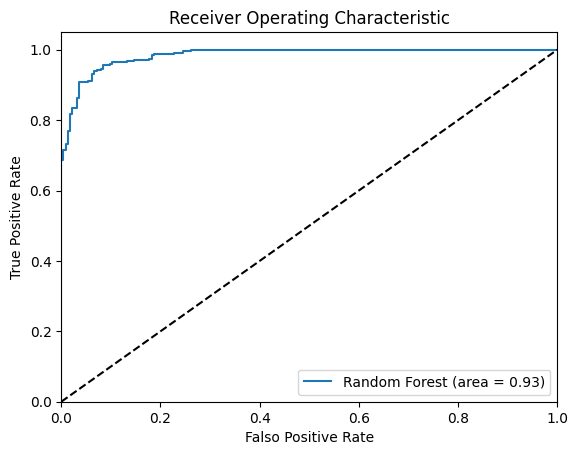

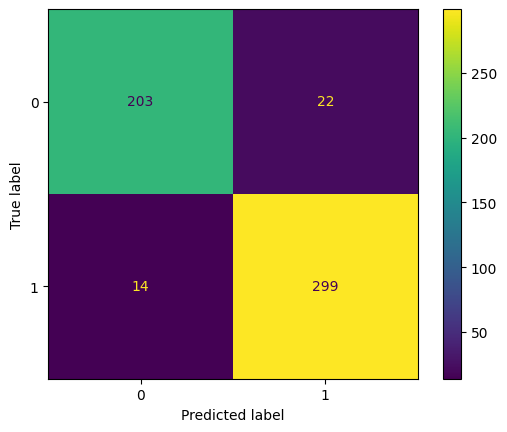

In [23]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_score_adjusted)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota

In [25]:
best_clf

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)